# Handwriting Compare: DCGAN vs LSTM-MDN

This notebook compares generated outputs and evaluation metrics for:
- DCGAN image generation
- LSTM+MDN stroke-sequence generation (rendered to image)

In [1]:
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

ROOT = Path('..')
REPORTS = ROOT / 'reports'

In [2]:
def show_if_exists(path, title=''):
    path = Path(path)
    if not path.exists():
        print(f'Missing: {path}')
        return
    img = Image.open(path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(title or path.name)
    plt.show()

## Real and Generated Samples

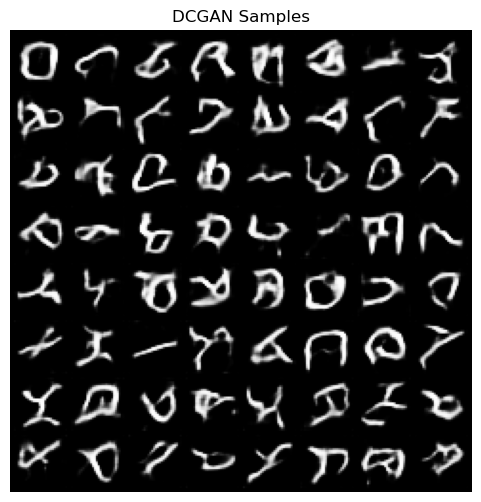

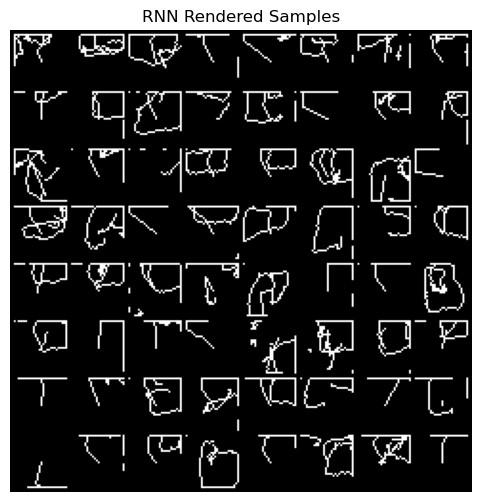

In [3]:
show_if_exists(REPORTS / 'samples_dcgan.png', 'DCGAN Samples')
show_if_exists(REPORTS / 'samples_rnn.png', 'RNN Rendered Samples')

## GAN Latent Interpolation

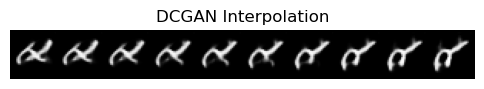

In [4]:
show_if_exists(REPORTS / 'samples_dcgan_interp.png', 'DCGAN Interpolation')

## Stroke Plots

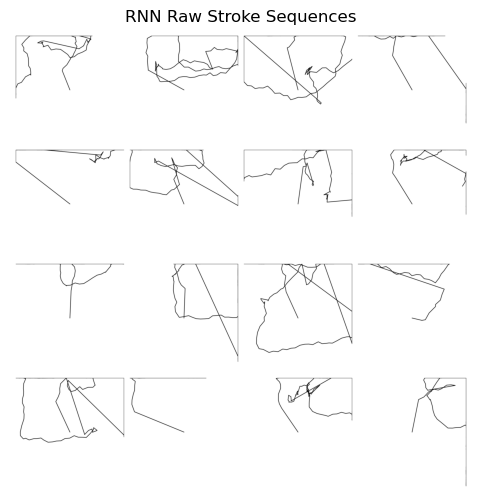

In [5]:
show_if_exists(REPORTS / 'samples_rnn_strokes.png', 'RNN Raw Stroke Sequences')

## Metrics

In [6]:
metrics_path = REPORTS / 'metrics.json'
if metrics_path.exists():
    with metrics_path.open('r', encoding='utf-8') as f:
        metrics = json.load(f)
    display(pd.DataFrame([metrics]).T.rename(columns={0: 'value'}))
else:
    print(f'Missing: {metrics_path}')

,value
gan_class_entropy,3.174033
gan_classifier_confidence_mean,0.705627
gan_classifier_confidence_p80,0.952464
rnn_pen_lifts_mean,30.374600
rnn_render_class_entropy,2.606854
rnn_render_classifier_confidence_mean,0.602598
rnn_smoothness_mean_abs_turn,0.867660
rnn_stroke_length_mean,8.759883


## Short Conclusion

Use this space to summarize which model looked sharper, which one produced more structured trajectories, and how classifier confidence/diversity compared.